<a href="https://colab.research.google.com/github/sahilgosain/UCLA-Phys-4AL/blob/main/Complex_fit_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** Sahil Gosain\
**Date:** March 2021

This file aims to 
* create a function which would describe the theoretical unforced oscillation (vertical displacement) of an oscillator bob which loses mass linearly over time
* fit datasets to this theoretical function
* analyze any other quantities which may be important to the behavior of the system

In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.optimize import least_squares
drive.mount('drive')

Mounted at drive


In [ ]:
#constants
g = 9.81;
k_blue = 29.00;         #Measured Spring constant for blue exercise band 
k_orange = 77.097;      #   "       "       "      "  orange   "     " 
k_green = 248.76;       #   "       "       "      "  green    "     " 

In [ ]:
#Fit functions

# Parameters -------------------------------------------------------
# k ------->  Spring constant
# M0 ------>  Initial Mass
# gamma --->  Rate of mass loss
# A0 ------>  Initial vertical displacement
# Q ------->  Oscillation Damping coefficient
# offset -->  Vertical offset of function, used in data fitting
# phi ----->  Phase offset of function, used in data fitting
# ------------------------------------------------------------------

# Describes oscillation amplitude vs time --------------------------
# A(t) = A0 * e ^ (-Q*t)
def decay_fx(t, parameters):
  k = parameters[0]             #Not used in this eqn
  M0 = parameters[1]            #Not used in this eqn
  gamma = parameters[2]         #Not used in this eqn
  A0 = parameters[3]
  Q = parameters[4]
  offset = parameters[5]        #Not used in this eqn
  phi = parameters[6]           #Not used in this eqn

  return A0 * np.exp(-Q * t)
# ------------------------------------------------------------------

# Describes inst. force equilibrium point for oscillation vs time --
def eq_linear_fx(t,parameters):
  k = parameters[0]
  M0 = parameters[1]
  gamma = parameters[2]
  A0 = parameters[3]            #Not used in this eqn
  Q = parameters[4]             #Not used in this eqn
  yint = parameters[5]
  phi = parameters[6]           #Not used in this eqn

  return g/k * (M0 - gamma * t) + (yint - g * M0 / k)
# ------------------------------------------------------------------

# Describes inst. natural oscillation frequency vs time ------------
def freq_fx(t, parameters):
  k = parameters[0]
  M0 = parameters[1]
  gamma = parameters[2]
  A0 = parameters[3]            #Not used in this eqn
  Q = parameters[4]             #Not used in this eqn
  offset = parameters[5]        #Not used in this eqn
  phi = parameters[6]           #Not used in this eqn

  return np.sqrt(k / (M0 - gamma * t))
# ------------------------------------------------------------------

# Describes sinusoid with varying frequency ------------------------
def freq_sin_fx(t, parameters):
  k = parameters[0]
  M0 = parameters[1]
  gamma = parameters[2]
  A0 = parameters[3]
  Q = parameters[4]
  offset = parameters[5]
  phi = parameters[6]

  return np.sin(freq_fx(t, parameters) * t + phi)
# ------------------------------------------------------------------

# Describes overall fit function -----------------------------------
def fit_fx(t, parameters):
  k = parameters[0]
  M0 = parameters[1]
  gamma = parameters[2]
  A0 = parameters[3]
  Q = parameters[4]
  offset = parameters[5]
  phi = parameters[6]

  return decay_fx(t, parameters) * freq_sin_fx(t, parameters) - eq_linear_fx(t, parameters)
# ------------------------------------------------------------------

# Describes envelope function for oscillation data -----------------
def envelope_fx(t, parameters):
  k = parameters[0]
  M0 = parameters[1]
  gamma = parameters[2]
  A0 = parameters[3]
  Q = parameters[4]
  offset = parameters[5]
  phi = parameters[6]

  return [decay_fx(t, parameters), -decay_fx(t, parameters)] - eq_linear_fx(t, parameters)
# ------------------------------------------------------------------

Example Theoretical function, with its equilibrium centercurve function and amplitude envelope functions

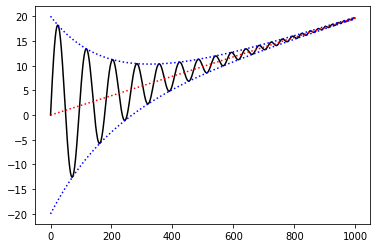

In [ ]:
sample_time = np.linspace(0, 100, 1000)
plt.plot(fit_fx(sample_time, [2, 5, 0.04, 20, 0.05, 0, 0]), color = "black");
plt.plot(envelope_fx(sample_time, [2, 5, 0.04, 20, 0.05, 0, 0])[0], linestyle = "dotted", color = "blue");
plt.plot(envelope_fx(sample_time, [2, 5, 0.04, 20, 0.05, 0, 0])[1], linestyle = "dotted", color = "blue");
plt.plot(-eq_linear_fx(sample_time, [2, 5, 0.04, 20, 0.05, 0, 0]), linestyle = "dotted", color = "red");

In [ ]:
data = [];
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 1 Tracker Data.csv", delimiter = ",", skiprows = 2))
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 2.csv", delimiter = ",", skiprows = 2))
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 3 Data.csv", delimiter = ",", skiprows = 2))           #Sahil
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 4 (Exportable).csv", delimiter = ",", skiprows = 1))
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 5.csv", delimiter = ",", skiprows = 1))
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 6.csv", delimiter = ",", skiprows = 1))
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 7.csv", delimiter = ",", skiprows = 2))
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 8.csv", delimiter = ",", skiprows = 2))
data.append(np.loadtxt("/content/drive/MyDrive/Freshman Year ('20 - '21)/Q2/PHYS 4AL/Final Project Data/Lab 4 Data - Run 9.csv", delimiter = ",", skiprows = 2))

dataLen = len(data)

#Create 2D arrays for time and position data, where...
#First index indicates    Trial #
#Second index indicates   datapoint within trial dataset

time = [];
pos = [];
for i in range(0, dataLen):
  time.append(data[i][:, 0])

pos.append(data[0][:, 1])
pos.append(data[1][:, 2])
pos.append(data[2][:, 2])
pos.append(data[3][:, 1])
pos.append(data[4][:, 2])
pos.append(data[5][:, 2])
pos.append(data[6][:, 1])
pos.append(data[7][:, 1])
pos.append(data[8][:, 1])

Plotting data, as point plot and curve superimposed

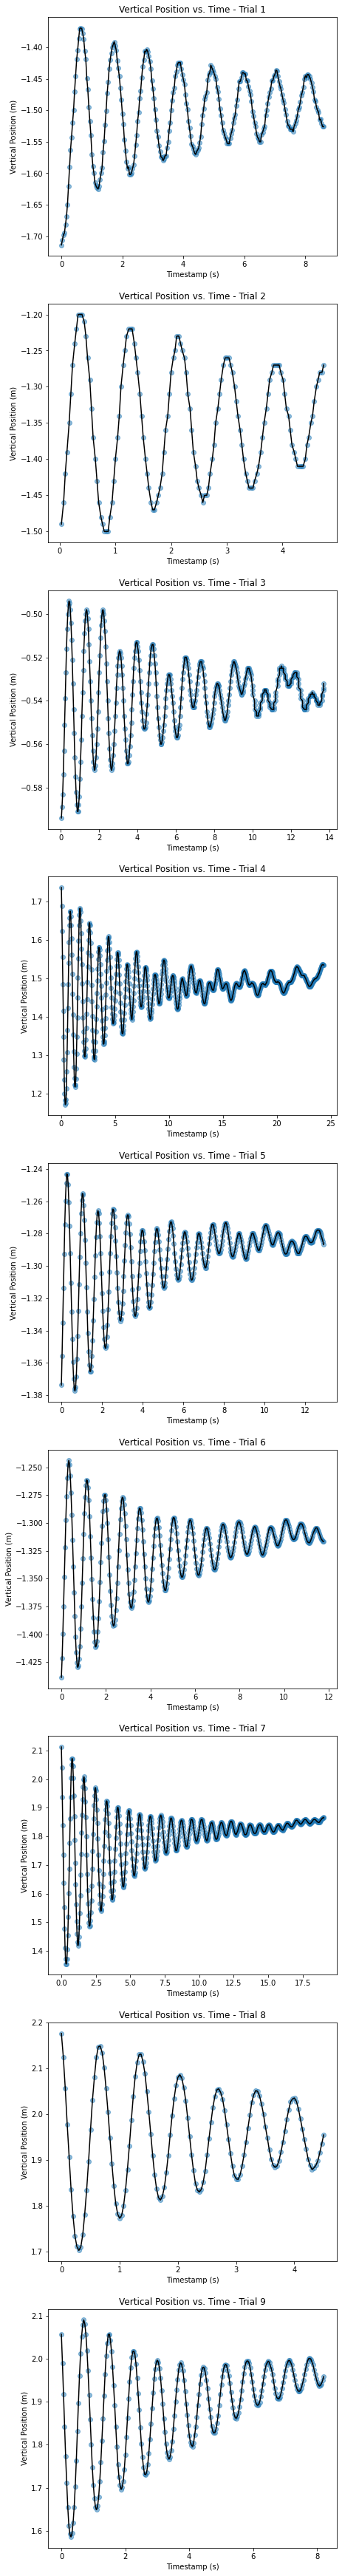

In [ ]:
fig = plt.figure(figsize = (7, 7 * dataLen))
for i in range (0, dataLen):
  plt.subplot(dataLen, 1, i + 1)
  plt.scatter(time[i], pos[i], label = "Data", alpha = 0.5);
  plt.plot(time[i], pos[i], label = "Data", color = "Black");
  plt.title("Vertical Position vs. Time - Trial " + str(i + 1));
  plt.xlabel("Timestamp (s)");
  plt.ylabel("Vertical Position (m)")

##Data Fits:

In [ ]:
def fit_residuals(parameters, data, t):
  residuals = np.abs(data - fit_fx(t, parameters))
  return residuals

In [ ]:
#Apply guesses for each parameter for best fit function,
#then least squares will find the best fit parameters for each dataset's fit function

guess_parameters = [];
                      #  k val,    m_0,  |dm/dt|,  Amp_0, Q(exp), y int,  phi
guess_parameters.append([k_orange, 5.18, 0.00114, 0.1325, 0.180, 1.51, -np.pi/2])   #Run 1
guess_parameters.append([k_blue, 1.45, 0.000983, 0.15, 0.204, 1.36, -np.pi/2])      #Run 2
guess_parameters.append([k_orange, 2.329, 0.00923, 0.055, 0.25, 0.545, -np.pi/2])   #Run 3
guess_parameters.append([k_orange, 2.329, 0.00933, 0.600, 0.314, -1.80, np.pi/2])   #Run 4
guess_parameters.append([k_orange, 1.906, 0.0375, 0.069, 0.273, 1.31, -np.pi/2])    #Run 5
guess_parameters.append([k_orange, 2.108, 0.0339, 0.100, 0.235, 1.34, -np.pi/2])    #Run 6
guess_parameters.append([k_orange, 2.193, 0.0333, 0.390, 0.211, -1.74, np.pi/2])    #Run 7
guess_parameters.append([k_orange, 1.704, 0.0681, 0.245, 0.333, -1.95, np.pi/2])    #Run 8
guess_parameters.append([k_orange, 2.032, 0.0741, 0.255, 0.306, -1.84, np.pi/2])    #Run 9

res_lsq = [];
best_parameters = [];

for i in range(0, dataLen):
  sol = least_squares(fit_residuals, guess_parameters[i],
                        args = (pos[i], time[i]))
  res_lsq.append(sol)
  best_parameters.append(sol['x'])

#print(best_parameters)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


In [ ]:
data_fits = [];
for i in range(0, dataLen):
   data_fits.append(fit_fx(time[i], best_parameters[i]))

In [ ]:
#Function to create position vs time plot
def make_pos_plot(n):
  plt.scatter(time[n], pos[n], label = "Data", color = "Green", alpha = 0.65);
  plt.plot(time[n], data_fits[n], label = "Model", color = "Black", alpha = 0.65);
  plt.title("Vertical Position vs. Time - Trial " + str(n + 1));
  plt.legend();
  plt.xlabel("Timestamp (s)");
  plt.ylabel("Vertical Position (m)")

In [ ]:
#Function to create frequency vs time plot
def make_freq_plot(n):
  #plt.scatter(time[n], pos[n], label = "Data", color = "Green", alpha = 0.65);
  plt.plot(time[n], freq_fx(time[n], best_parameters[n]), label = "Model", color = "Red", linestyle = "dotted");
  plt.title("Angular Frequency vs. Time - Trial " + str(n + 1));
  plt.legend();
  plt.xlabel("Timestamp (s)");
  plt.ylabel("Angular Frequency (Hz)")

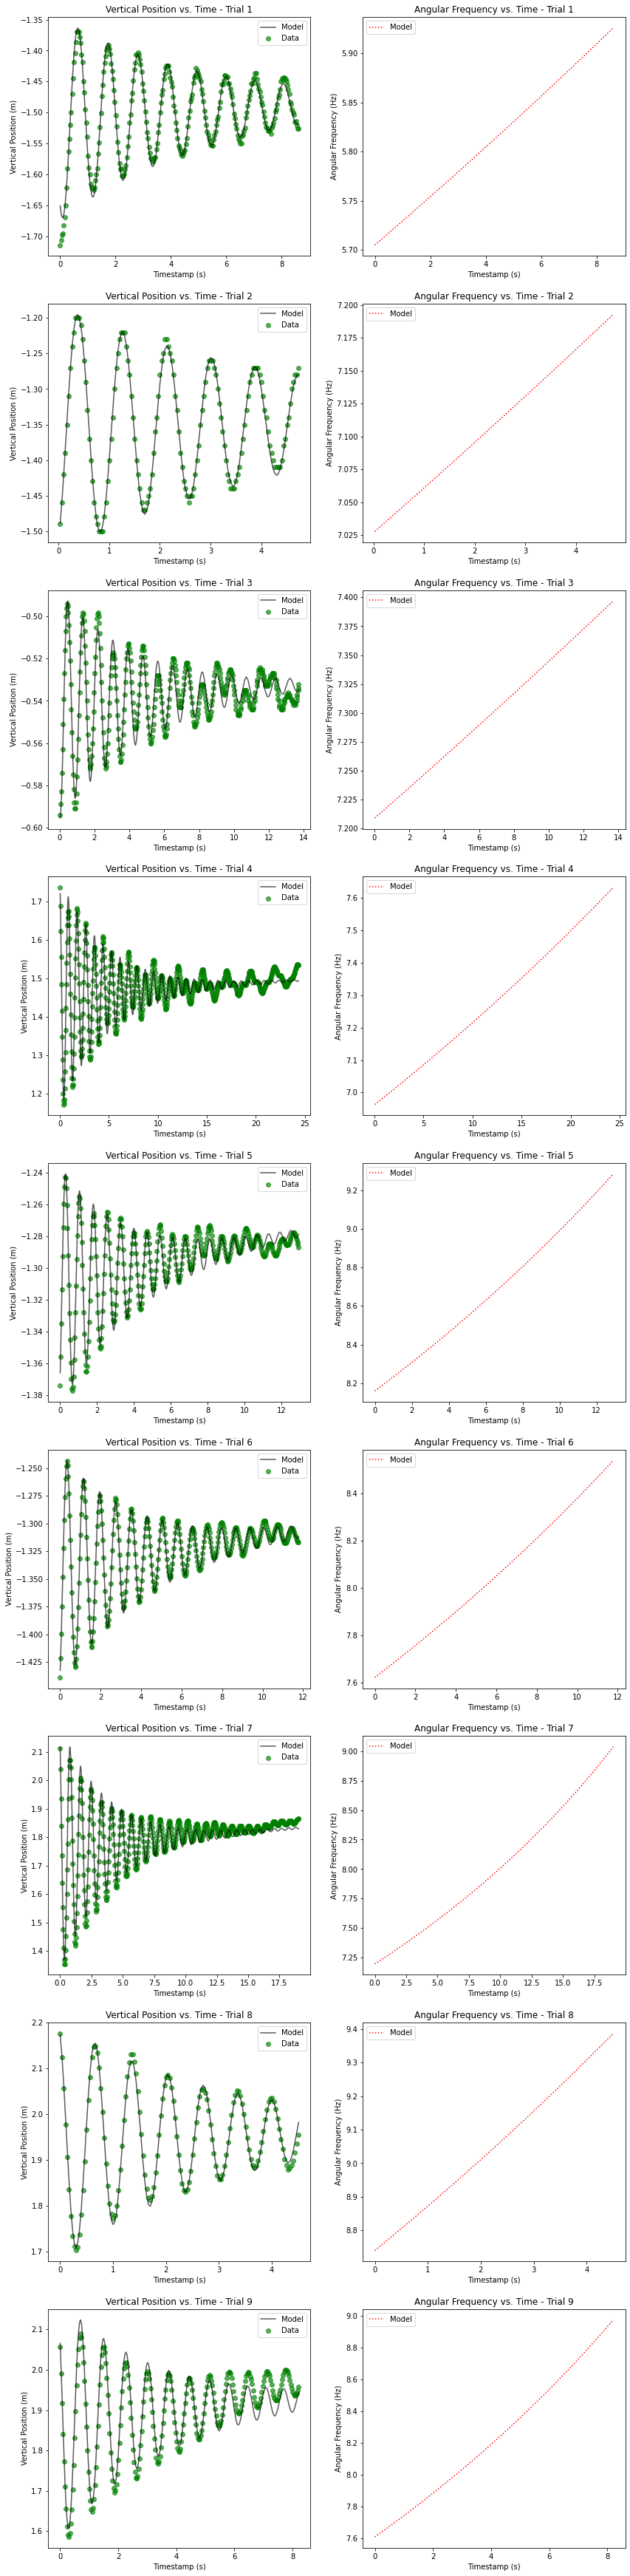

In [ ]:
fig = plt.figure(figsize = (14, 7 * dataLen))
for i in range (0, dataLen):
  plt.subplot(dataLen, 2, 2*i + 1)
  make_pos_plot(i);

  plt.subplot(dataLen, 2, 2*i + 2)
  make_freq_plot(i);

##Derivative for Oscillation

In [ ]:
vel = [];
for i in range(0, dataLen):
  vel.append(np.gradient(pos[i], time[i]))

acc = [];
for i in range(0, dataLen):
  acc.append(np.gradient(vel[i], time[i]))

trip_deriv = [];
for i in range(0, dataLen):
  trip_deriv.append(np.gradient(acc[i], time[i]))

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1072: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1072: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1073: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1073: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1074: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1074: RuntimeWarning: invalid value encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.7/dist

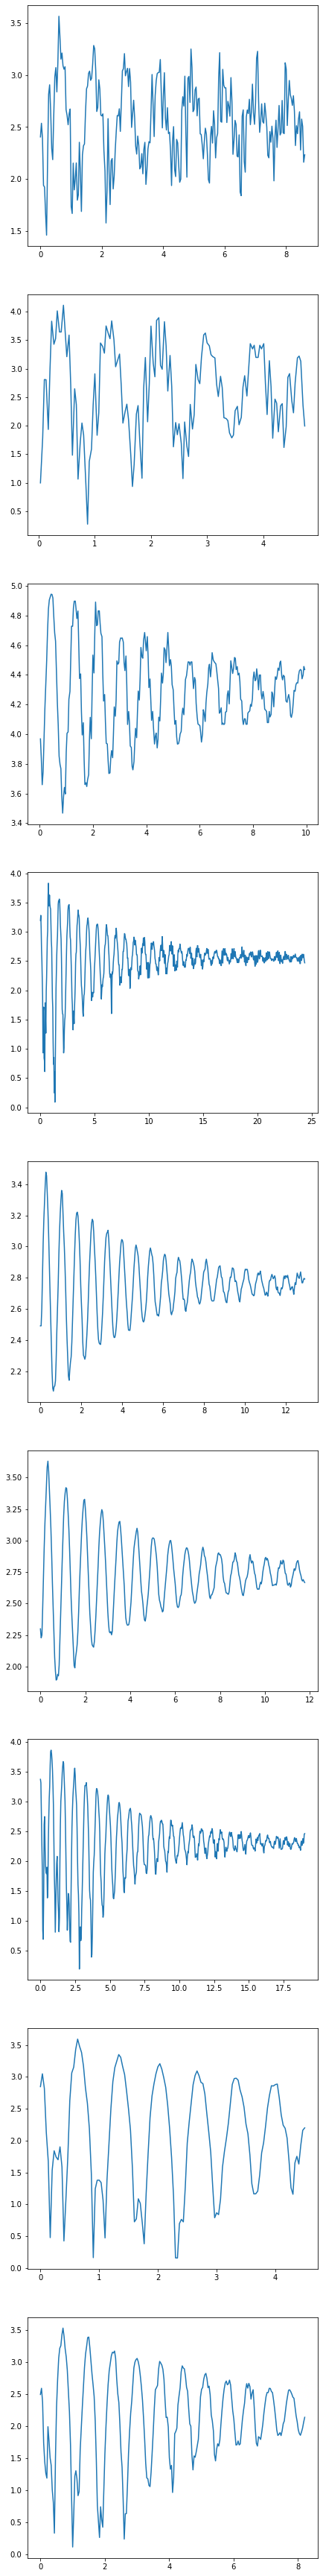

In [ ]:
fig = plt.figure(figsize = (7, 7 * dataLen))
for i in range (0, dataLen):
  plt.subplot(dataLen, 1, i + 1)
  plt.plot(time[i], np.sqrt(np.abs((acc[i]-g)/pos[i])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


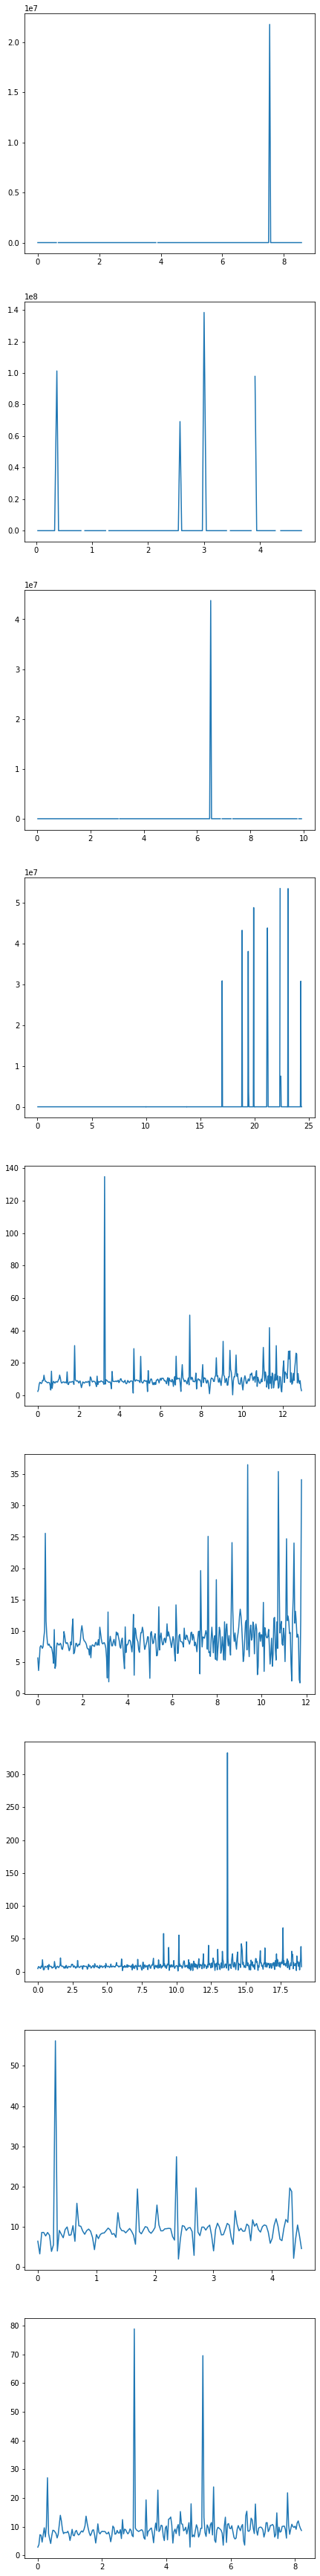

In [ ]:
fig = plt.figure(figsize = (7, 7 * dataLen))
for i in range (0, dataLen):
  plt.subplot(dataLen, 1, i + 1)
  plt.plot(time[i], np.sqrt(np.abs((trip_deriv[i])/vel[i])))

##Misc:

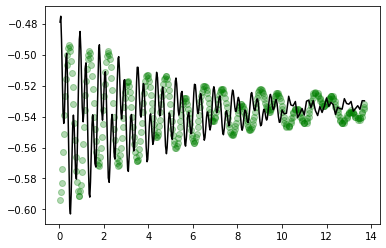

In [ ]:
#Trial 3 Dichromacity

dichrom3 = (1/np.sqrt(2)) * decay_fx(time[2], best_parameters[2]) * ( np.sin(freq_fx(time[2], best_parameters[2]) * time[2] + best_parameters[2][5]) + np.sin(3 * freq_fx(time[2], best_parameters[2]) * time[2] + best_parameters[2][5])) - eq_linear_fx(time[2], best_parameters[2])

plt.scatter(time[2], pos[2], alpha=0.3, color = "Green");
plt.plot(time[2], dichrom3, color = "Black");

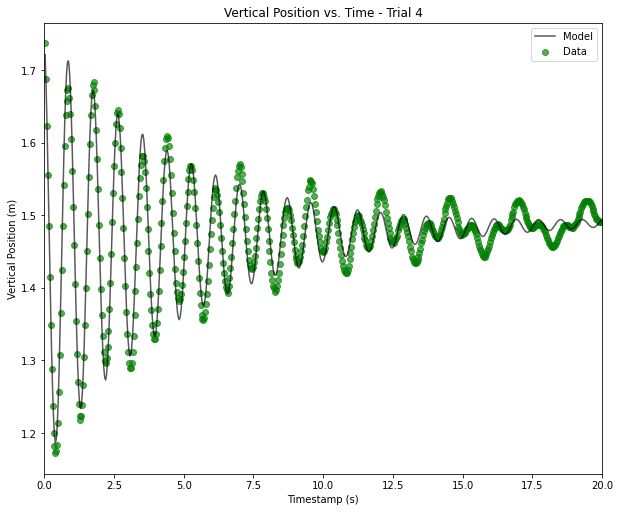

In [ ]:
plt.figure(figsize = (10, 8.3))
make_pos_plot(3)
plt.xlim(0, 20);

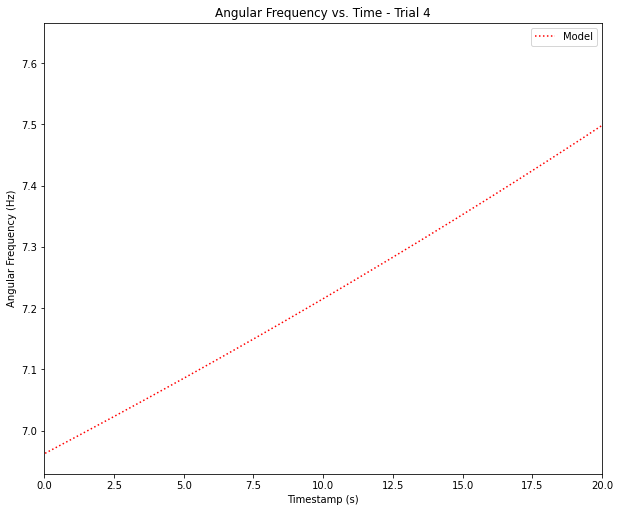

In [ ]:
plt.figure(figsize = (10, 8.3))
make_freq_plot(3)
plt.xlim(0, 20);

In [ ]:
#Finding Frequency Change
for i in range (0, dataLen):
  delta = (freq_fx(time[i][-1], best_parameters[i]) - freq_fx(time[i][0], best_parameters[i]))
  print(str(delta))

print()
#Finding Average Frequency Rate of Change
for i in range (0, dataLen):
  delta = (freq_fx(time[i][-1], best_parameters[i]) - freq_fx(time[i][0], best_parameters[i])) / (time[i][-1] - time[i][0])
  print(str(delta))

0.22064556144556935
0.16500175483132207
0.18788105726162652
0.6695841161784344
1.1275951374352946
0.9184358774566457
1.8372736152065299
0.6477795219658837
1.3646306042492435

0.025626662188800158
0.03503221970941021
0.013747360903629005
0.02752658237115866
0.08732315261756031
0.0779760647332142
0.09660200931734213
0.14380719768362388
0.16625211425760136


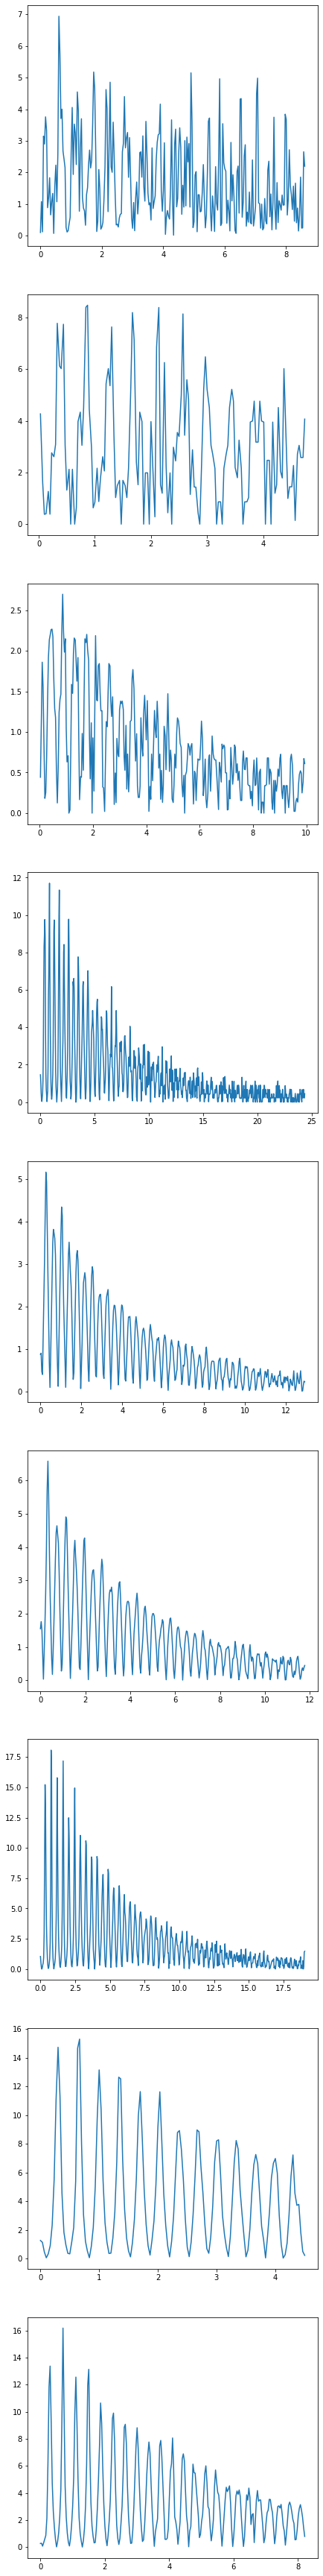

In [ ]:
#Curvature
curvature = [];
for i in range (0, dataLen):
  curvature.append(np.abs(acc[i])/((1 + vel[i] ** 2) ** (3/2)))

fig = plt.figure(figsize = (7, 7 * dataLen))
for i in range (0, dataLen):
  plt.subplot(dataLen, 1, i + 1)
  plt.plot(time[i], curvature[i])

####Spring Constant + Error:

This section documents the process to obtain the spring constant for each exercise band

In [ ]:
mass = np.array([1.25, 2.5, 3.75, 5, 6.25, 7.5, 9, 13])
lenBefore = np.array([39, 40.5, 42.5, 44.5, 47.5, 49.5, 53.5, 65.25])
lenAfter = np.array([40.5, 42, 44, 46, 48.5, 51.25, 55.125, 66.5])

mass = mass * 0.45359 * 9.81    #conversion to force in N
lenBefore *= 0.0254             #unit conversion from in to m
lenAfter *= 0.0254              #unit conversion from in to m

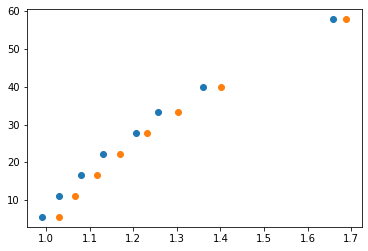

In [ ]:
plt.scatter(lenBefore, mass)
plt.scatter(lenAfter, mass)

In [ ]:
linB, ElinB = np.polyfit(lenBefore, mass, 1, cov = True)
linA, ElinA = np.polyfit(lenAfter, mass, 1, cov = True)

print(str(linB[0]) + " +/- " + str(np.sqrt(ElinB[0,0])))
print(str(linA[0]) + " +/- " + str(np.sqrt(ElinA[0,0])))

paraB, EparaB = np.polyfit(mass, lenBefore, 2, cov = True)
paraA, EparaA = np.polyfit(mass, lenAfter, 2, cov = True)

print(str(paraB[0]) + " +/- " + str(np.sqrt(EparaB[0,0])))
print(str(paraA[0]) + " +/- " + str(np.sqrt(EparaA[0,0])))

77.09740950500239 +/- 4.974289089551449
77.59641119517174 +/- 4.852619123967905
0.00011662384859933652 +/- 8.229333204878806e-06
0.0001135054054748296 +/- 4.072348508437292e-06
